In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
# 1. 폰트 파일 경로 설정
font_path = r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\5_fonts\Pretendard-Medium.otf"

# 2. 폰트 이름 가져오기
font_name = fm.FontProperties(fname = font_path).get_name()
fm.fontManager.addfont(font_path)

# 3. Matplotlib의 기본 폰트로 설정
plt.rc("font", family = font_name)

# 4. 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

print(f"설정된 폰트 이름: {font_name}")

설정된 폰트 이름: Pretendard


In [3]:
df = pd.read_csv(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\1_data\processed\df_final_v2.csv")
df["datetime"] = pd.to_datetime(df["datetime"])

In [4]:
def get_season(m):
    if m in [3, 4, 5]: return "봄"
    elif m in [6, 7, 8]: return "여름"
    elif m in [9, 10, 11]: return "가을"
    else: return "겨울"

df["season"] = df["month"].apply(get_season)

def dust_grade(v):
    if v <= 30: return "좋음"
    elif v <= 80: return "보통"
    elif v <= 150: return "나쁨"
    else: return "매우나쁨"

df["dust_grade"] = df["미세먼지(PM10)"].apply(dust_grade)

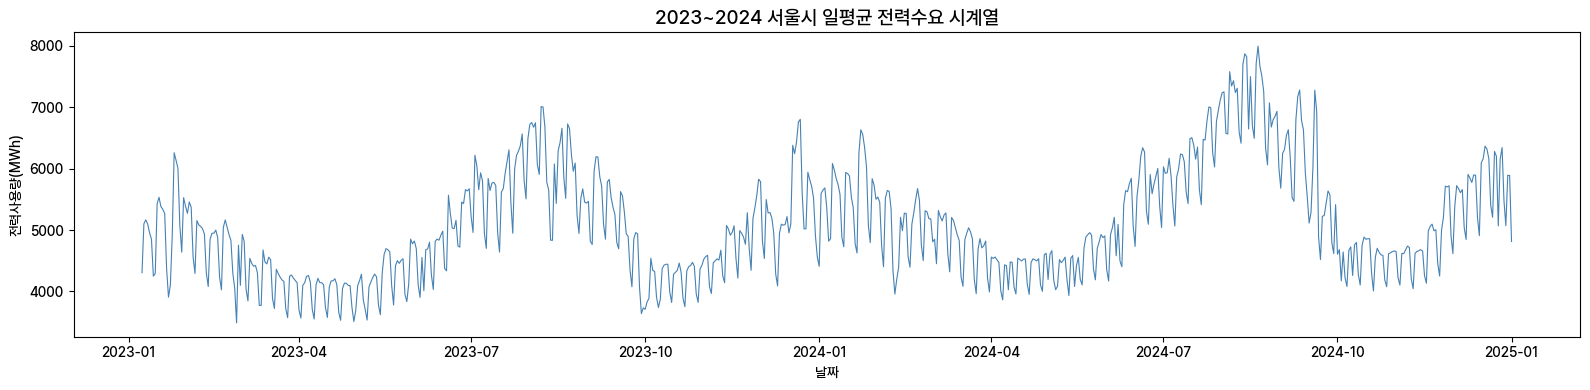

In [5]:
# ── 1. 시계열 전력수요(평균) ──────────────────────────
# 날짜별 평균 전력수요를 선 그래프로 표현
# 2년치 흐름을 한눈에 파악 → 계절별 수요 변화 패턴 확인용

fig, ax = plt.subplots(figsize = (16, 4))
daily = df.groupby(df["datetime"].dt.date)["전력사용량(MWh)"].mean()
ax.plot(daily.index, daily.values, color="steelblue", linewidth = 0.8)
ax.set_title("2023~2024 서울시 일평균 전력수요 시계열", fontsize = 14)
ax.set_xlabel("날짜")
ax.set_ylabel("전력사용량(MWh)")
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\서울시 일평균 전력수요 시계열.png", dpi=300)
plt.show()

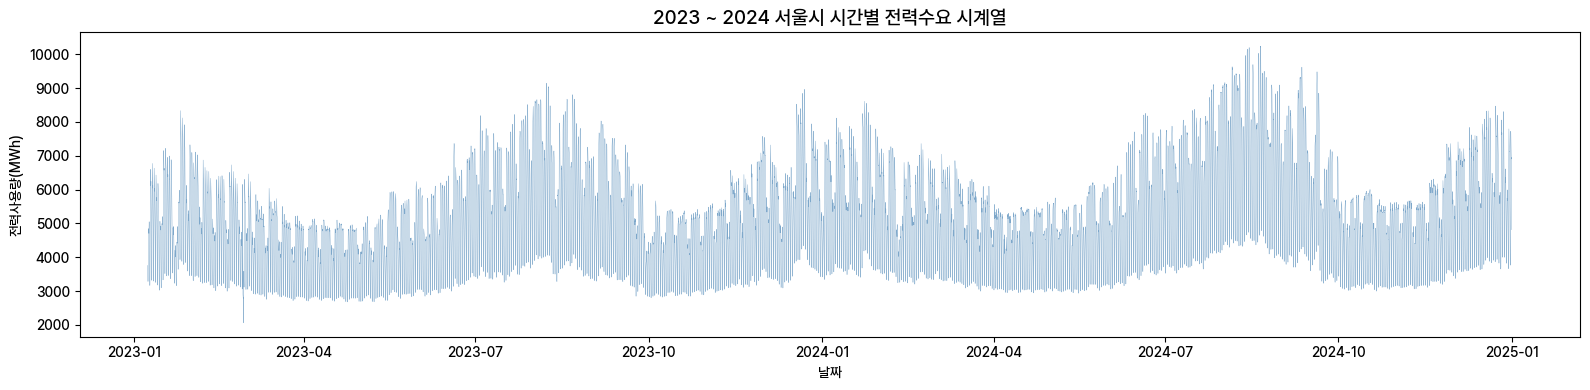

In [6]:
# ── 1. 시계열 전력수요(일별) ────────────────────────────────────
# 17,544개 시간별 원본 데이터를 그대로 시각화
# linewidth=0.3으로 얇게 → 데이터 밀도 표현
# 여름/겨울 피크가 물결처럼 반복되는 패턴 확인용

fig, ax = plt.subplots(figsize = (16, 4))
ax.plot(df["datetime"], df["전력사용량(MWh)"], color = "steelblue", linewidth = 0.3, alpha = 0.7)
ax.set_title("2023 ~ 2024 서울시 시간별 전력수요 시계열", fontsize = 14)
ax.set_xlabel("날짜")
ax.set_ylabel("전력사용량(MWh)")
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\서울시 일평균 전력수요 시계열(일별).png", dpi=300)
plt.show()

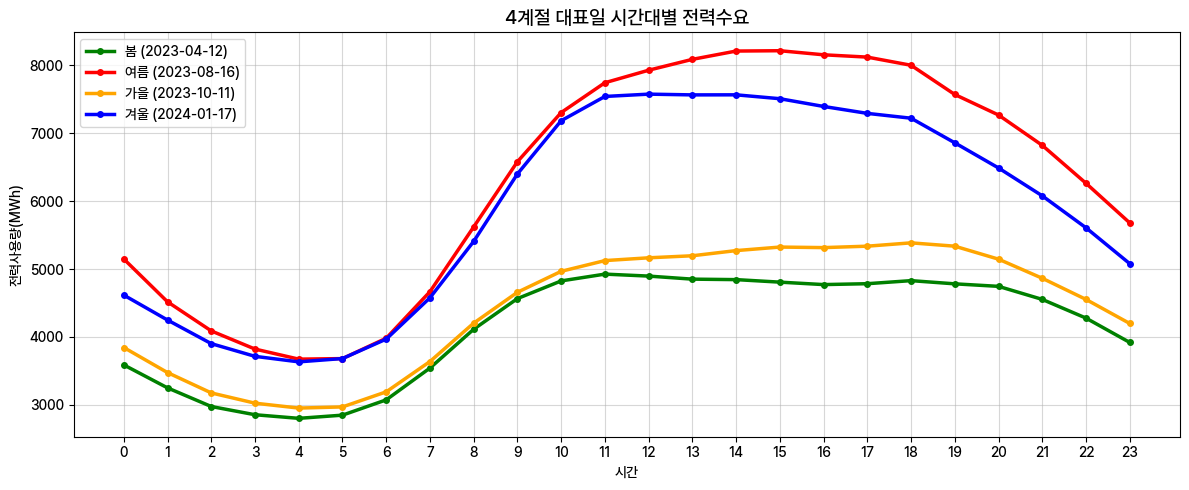

In [7]:
# ── 1-1. 시계열 전력수요 ────────────────────────────────────
# 봄/여름/가을/겨울 각 1일을 선택해 시간대별 수요 비교
# 계절마다 피크 시간대가 다름을 직관적으로 보여주는 그래프
# 덕커브의 계절별 형태 차이를 설명하는 핵심 그래프

fig, ax = plt.subplots(figsize = (12, 5))

seasons = {
    "봄 (2023-04-12)": "2023-04-12",
    "여름 (2023-08-16)": "2023-08-16",
    "가을 (2023-10-11)": "2023-10-11",
    "겨울 (2024-01-17)": "2024-01-17",
}

colors = {
    "봄 (2023-04-12)": "green",
    "여름 (2023-08-16)": "red",
    "가을 (2023-10-11)": "orange",
    "겨울 (2024-01-17)": "blue",
}

for label, date in seasons.items():
    data = df[df["기준일자"] == date].sort_values("hour")
    ax.plot(data["hour"], data["전력사용량(MWh)"], label = label, color = colors[label], linewidth = 2.5, marker = "o", markersize = 4)

ax.set_title("4계절 대표일 시간대별 전력수요", fontsize = 14)
ax.set_xlabel("시간")
ax.set_ylabel("전력사용량(MWh)")
ax.set_xticks(range(0, 24))
ax.legend()
ax.grid(True, alpha = 0.5)
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\4계절 대표일 시간대별 전력수요.png", dpi=300)
plt.show()

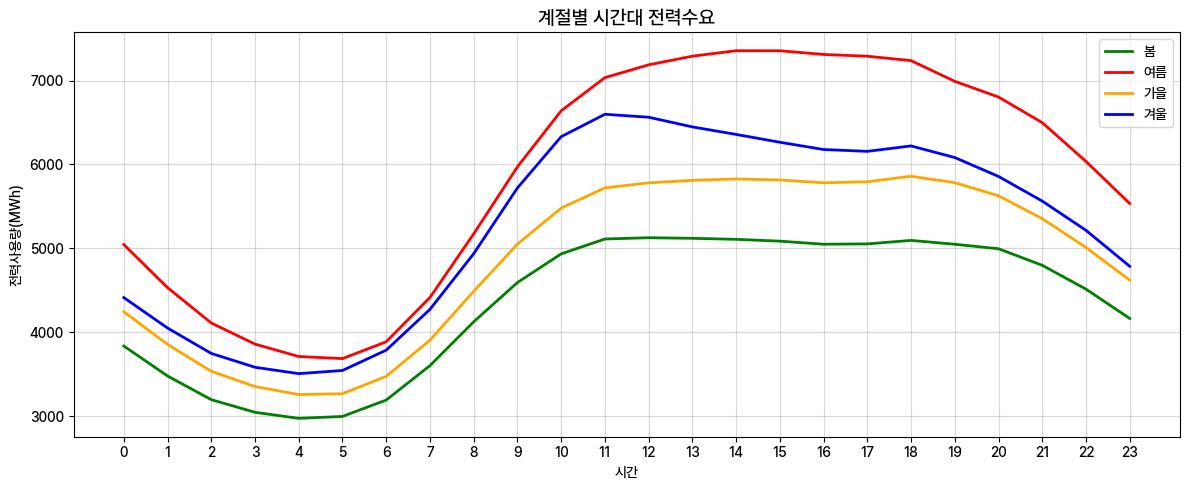

In [8]:
# ── 2. 계절별 시간대 전력 수요 ────────────────────────────────────
# 계절별 전체 데이터의 시간대 평균 → 대표일보다 신뢰도 높음
# 여름: 오후 피크 뚜렷 / 겨울: 오전+저녁 이중 피크
# 봄/가을: 수요 낮고 평탄한 형태 확인

fig, ax = plt.subplots(figsize = (12, 5))
colors = {
    "봄": "green",
    "여름": "red",
    "가을": "orange",
    "겨울": "blue",
}
for season, color in colors.items():
    data = df[df["season"] == season].groupby("hour")["전력사용량(MWh)"].mean()
    ax.plot(data.index, data.values, label = season, color = color, linewidth = 2)

ax.set_title("계절별 시간대 전력수요", fontsize = 14)
ax.set_xlabel("시간")
ax.set_ylabel("전력사용량(MWh)")
ax.set_xticks(range(0, 24))
ax.legend()
ax.grid(True, alpha = 0.5)
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\계절별 시간대 전력수요.png", dpi=300)
plt.show()

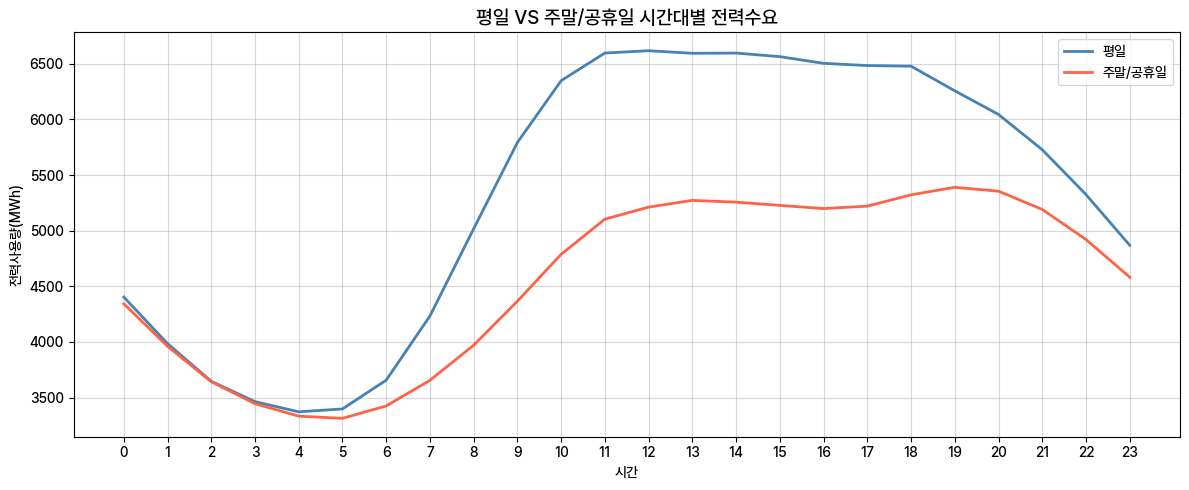

In [10]:
# ── 3.  주중 VS 주말 시간대 ────────────────────────────────────
# is_off 기준으로 두 그룹 분리하여 시간대별 수요 비교
# 평일: 오전 9시부터 급상승, 업무시간 피크
# 주말: 완만하고 낮은 수요, 피크 시간 늦어짐
# → 산업/상업 전력 비중이 크다는 인사이트 도출 가능

fig, ax = plt.subplots(figsize = (12, 5))
for is_off, label, color in [(0, "평일", "steelblue"), (1, "주말/공휴일", "tomato")]:
    data = df[df["is_off"] == is_off].groupby("hour")["전력사용량(MWh)"].mean()
    ax.plot(data.index, data.values, label = label, color = color, linewidth = 2)

ax.set_title("평일 VS 주말/공휴일 시간대별 전력수요", fontsize = 14)
ax.set_xlabel("시간")
ax.set_ylabel("전력사용량(MWh)")
ax.set_xticks(range(0, 24))
ax.legend()
ax.grid(True, alpha = 0.5)
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\평일 VS 주말,공휴일 시간대별 전력수요.png", dpi=300)
plt.show()

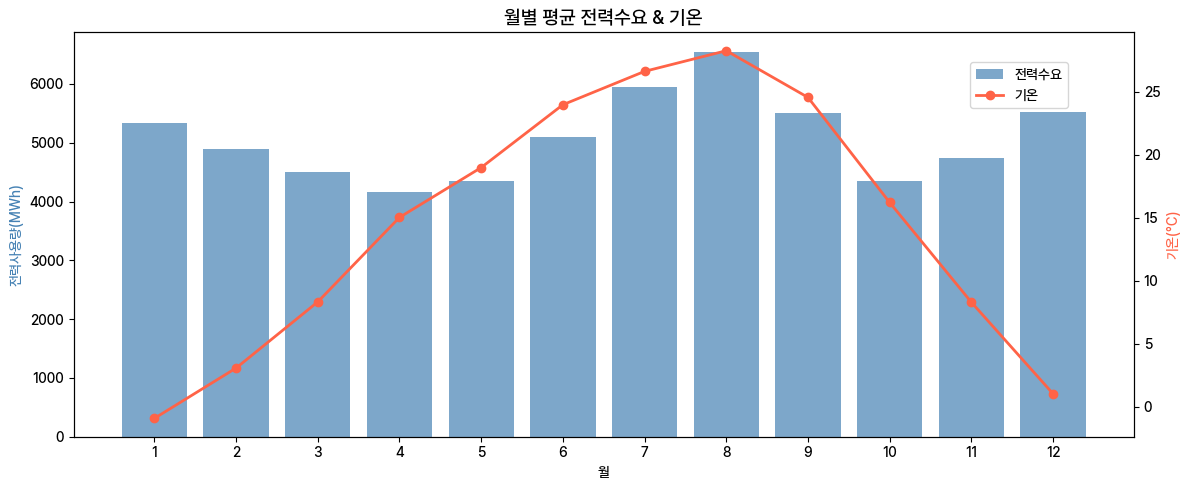

In [11]:
# ── 4. 월별 전력수요 + 기온 이중축 ────────────────────────────────────
# 막대: 월별 평균 전력수요 / 선: 월별 평균 기온
# 이중축(twinx)으로 두 변수 동시 표현
# 1월(겨울 난방)·8월(여름 냉방) 피크, 봄·가을 저점
# → U자형 관계를 월 단위로 시각적으로 증명

fig, ax1 = plt.subplots(figsize = (12, 5))
monthly = df.groupby("month").agg({"전력사용량(MWh)":"mean", "기온(°C)": "mean"})
ax1.bar(monthly.index, monthly["전력사용량(MWh)"], color = "steelblue", alpha = 0.7, label = "전력수요")
ax1.set_xlabel("월")
ax1.set_ylabel("전력사용량(MWh)", color = "steelblue")
ax2 = ax1.twinx()
ax2.plot(monthly.index, monthly["기온(°C)"], color = "tomato", linewidth = 2, marker = "o", label = "기온")
ax2.set_ylabel("기온(°C)", color = "tomato")
ax1.set_title("월별 평균 전력수요 & 기온", fontsize = 14)
ax1.set_xticks(range(1, 13))
fig.legend(loc = 'upper right', bbox_to_anchor = (0.9, 0.88))
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\월별 평균 전력수요, 기온.png", dpi=300)
plt.show()

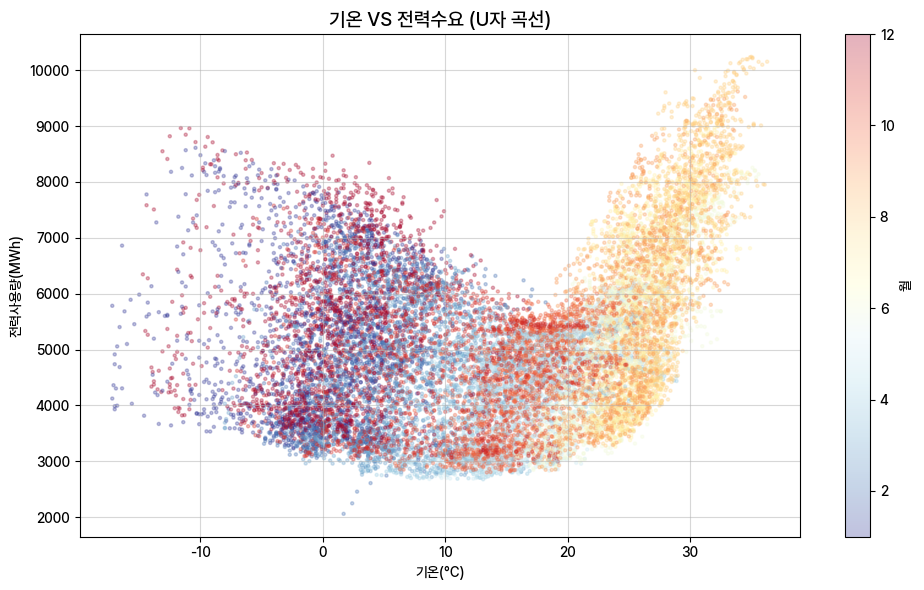

In [12]:
# ── 5. 기온 VS 전력수요 산점도 ────────────────────────────────────
# x축: 기온 / y축: 전력수요 / 색상: 월
# 15~20도 구간에서 수요 최저 → U자 곡선 확인
# 색상으로 계절 구분 → 여름(빨강)·겨울(파랑) 군집 시각화
# → 기온이 핵심 피처임을 증명하는 그래프

fig, ax = plt.subplots(figsize = (10, 6))
scatter = ax.scatter(df["기온(°C)"], df["전력사용량(MWh)"], c = df["month"], cmap = "RdYlBu_r", alpha = 0.3, s = 5)
plt.colorbar(scatter, ax = ax, label = "월")
ax.set_title("기온 VS 전력수요 (U자 곡선)", fontsize = 14)
ax.set_xlabel("기온(°C)")
ax.set_ylabel("전력사용량(MWh)")
ax.grid(True, alpha = 0.5)
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\기온 VS 전력수요(U자 곡선).png", dpi=300)
plt.show()

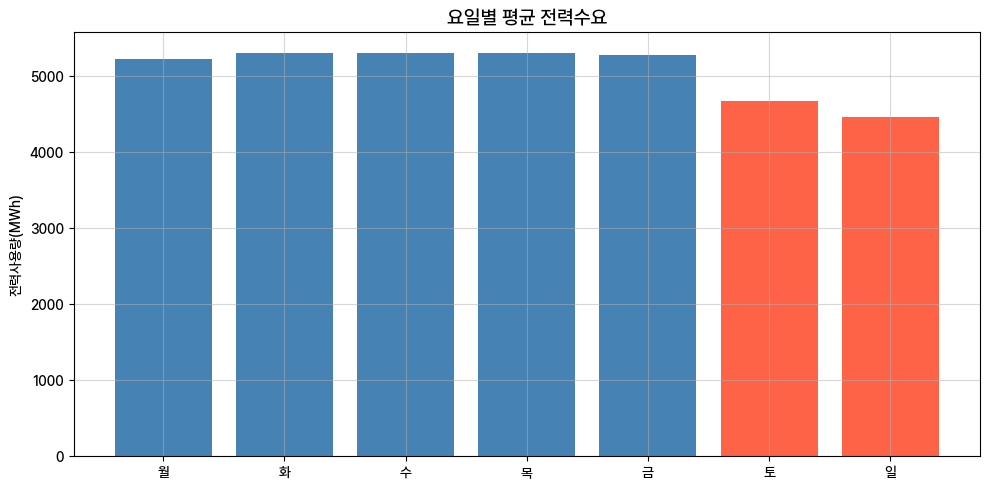

In [13]:
# ── 6. 요일별 평균 전력수요 ────────────────────────────────────
# 월~금 파란색, 토~일 빨간색으로 구분
# 주중 평균 > 주말 평균 차이를 직관적으로 표현
# 금요일부터 수요 감소 시작하는 패턴 확인

fig, ax = plt.subplots(figsize = (10, 5))
dow_labels = ["월", "화", "수", "목", "금", "토", "일"]
dow = df.groupby("dayofweek")["전력사용량(MWh)"].mean()
colors_dow = ["steelblue"] * 5 + ["tomato"] * 2
ax.bar(dow_labels, dow.values, color = colors_dow)
ax.set_title("요일별 평균 전력수요", fontsize = 14)
ax.set_ylabel("전력사용량(MWh)")
ax.grid(True, alpha = 0.5)
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\요일별 평균 전력수요.png", dpi=300)
plt.show()

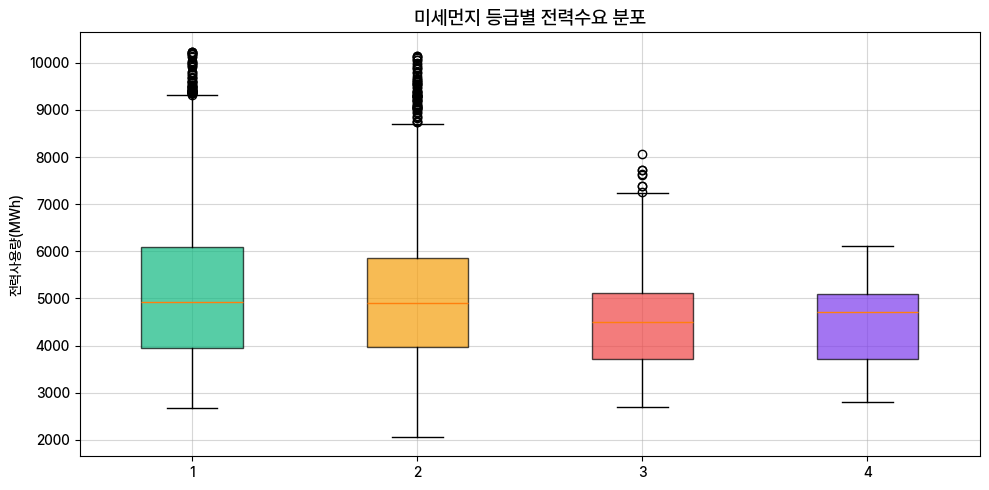

In [14]:
# ── 7. 미세먼지 등급별 전력수요 박스플롯 ────────────────────────────────────
# PM10 기준 좋음/보통/나쁨/매우나쁨 4등급으로 분류
# 등급별 전력수요 분포(중앙값, 사분위, 이상치) 비교
# 미세먼지 나쁜 날 수요가 오히려 낮음 → 계절 교란 효과
# → 미세먼지 단독 영향 해석 시 주의 필요 언급

fig, ax = plt.subplots(figsize = (10, 5))
order = ["좋음", "보통", "나쁨", "매우나쁨"]
data_by_grade = [df[df["dust_grade"] == g]["전력사용량(MWh)"].values for g in order]
bp = ax.boxplot(data_by_grade, label = order, patch_artist = True)
colors_dust = ["#10b981", "#f59e0b", "#ef4444", "#7c3aed"]
for patch, color in zip(bp["boxes"], colors_dust):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax.set_title("미세먼지 등급별 전력수요 분포", fontsize = 14)
ax.set_ylabel("전력사용량(MWh)")
ax.grid(True, alpha = 0.5)
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\미세먼지 등급별 전력수요 분포.png", dpi=300)
plt.show()

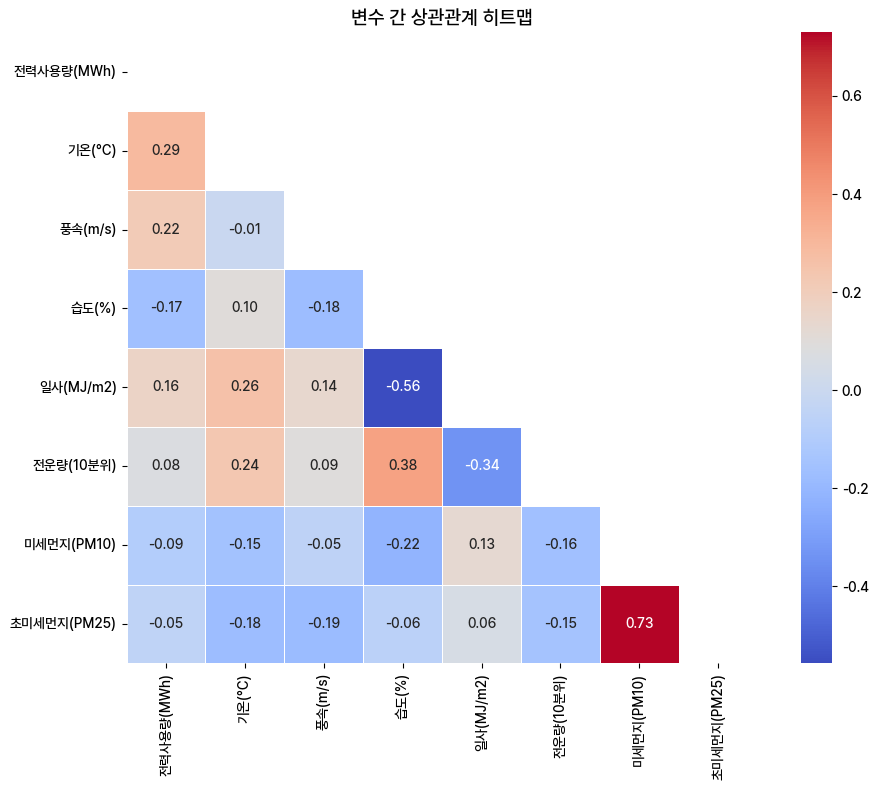

In [15]:
# ── 8. 상관관계 히트맵 ────────────────────────────────────
# 전력수요와 모든 수치형 변수 간 피어슨 상관계수 시각화
# mask=triu → 하삼각만 표시해 중복 제거
# 기온(0.28)이 상관관계 가장 높음
# 미세먼지는 약한 음의 상관 → 계절 역효과
# → 모델 피처 선택 근거 자료

fig, ax = plt.subplots(figsize = (10, 8))
cols = ["전력사용량(MWh)", "기온(°C)", "풍속(m/s)", "습도(%)",
        "일사(MJ/m2)", "전운량(10분위)", "미세먼지(PM10)", "초미세먼지(PM25)"]
corr = df[cols].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "coolwarm", mask = mask, ax = ax, square = True, linewidth = 0.5)
ax.set_title("변수 간 상관관계 히트맵", fontsize = 14)
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\변수 간 상관관계 히트맵.png", dpi=300)
plt.show()

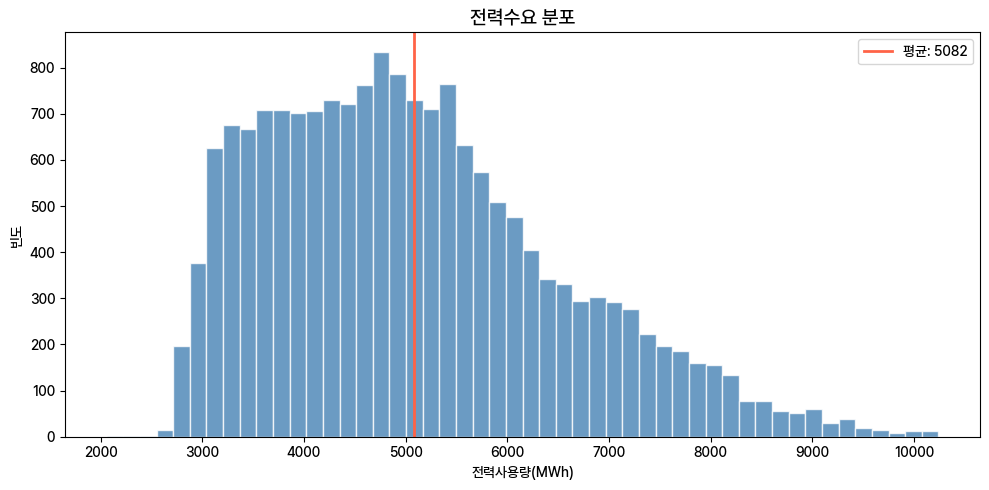

In [16]:
# ── 9. 전력수요 분포 히스토그램 ────────────────────────────────────
# 전력수요값의 전체 분포 확인
# 평균선(빨간 점선) 표시
# 정규분포 여부, 이상치 범위 파악
# 여름 피크로 인한 오른쪽 꼬리 분포 확인

fig, ax = plt.subplots(figsize = (10, 5))
ax.hist(df["전력사용량(MWh)"], bins = 50, color = "steelblue", edgecolor = "white", alpha = 0.8)
ax.axvline(df["전력사용량(MWh)"].mean(), color = "tomato", linewidth = 2, label = f'평균: {df["전력사용량(MWh)"].mean():.0f}')
ax.set_title("전력수요 분포", fontsize = 14)
ax.set_xlabel("전력사용량(MWh)")
ax.set_ylabel("빈도")
ax.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\전력수요 분포.png", dpi=300)
plt.show()

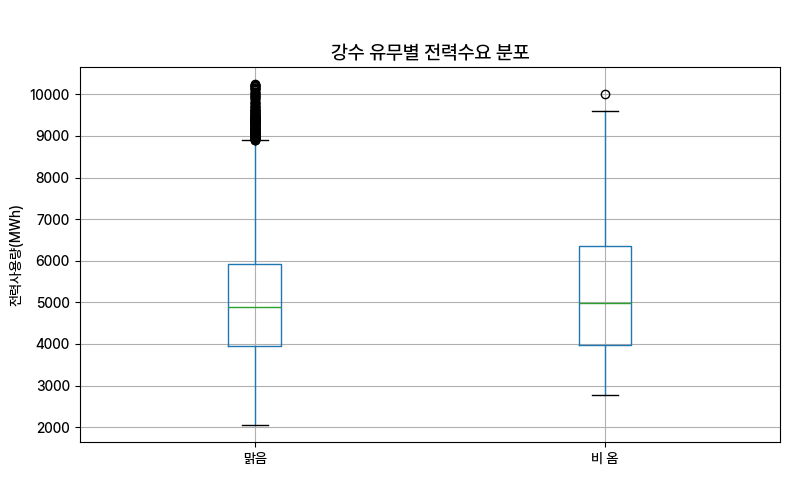

In [17]:
# ── 10. 강수 유무별 박스플롯 ────────────────────────────────────
# 강수량 > 0 → "비 옴" / 0 → "맑음" 두 그룹 분리
# 비 오는 날 vs 맑은 날 전력수요 분포 비교
# 강수 자체보다 동반되는 기온·계절 효과가 더 큼

fig, ax = plt.subplots(figsize = (8, 5))
df["강수여부"] = (df["강수량(mm)"] > 0).map({True: "비 옴", False: "맑음"})
df.boxplot(column = "전력사용량(MWh)", by = "강수여부", ax = ax)
ax.set_title("강수 유무별 전력수요 분포", fontsize = 14)
ax.set_xlabel(" ")
ax.set_ylabel("전력사용량(MWh)")
plt.suptitle(" ")
plt.tight_layout()
plt.savefig(r"C:\Users\User\Desktop\MyRepo\Portfolio\Portfolio_ver2\4_outputs\강수 유무별 전력수요 분포.png", dpi=300)
plt.show()